<center><h1> Analysis of EUR-USD and EUR-GBP Exchange Rates </h1></center>

## Table of Contents

- [Introduction](#1)
- [Data Exploration](#2)
- [Data Cleaning](#3)
- [Rolling Mean](#4)
- [Financial Crisis of 2007–2009 in US](#5)
- [Financial Crisis of 2008-2012 in EU](#6)
- [Financial Crisis of 2008-2012 in UK](#7)
- [Brexit](#8)
- [Conclusion](#9)

# 1

## Introduction
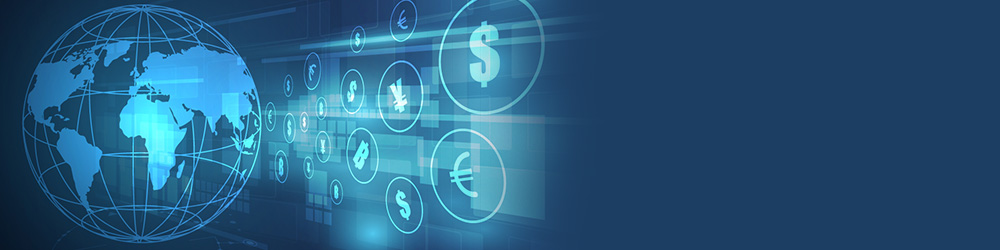

*Source*: [SBI](https://de.statebank/exchange-rate)

**Goal:** Investigate the variability of the exchange rates EUR-USD (United States) and EUR-GBP (United Kingdom) and determine their behavior during 2007-2008's financial crisis period.


**Dataset:** The dataset for this project shows daily exchange rates for the Euro from 1999 through 2022. Most nations in the European Union use the euro (€) as their official currency. The dataset was put together by Daria Chemkaeva and made accessible on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020); the data source is the European Central Bank. *Please note that the dataset is updated often.*

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mticker
import seaborn as sns
%matplotlib inline

# avoiding display of truncated columns 
pd.options.display.max_columns = 140
pd.options.display.max_colwidth = 50

### Support Functions

To gain clearer findings and more readable code, I'll create several supporting functions before continuing investigating the dataset.

In [2]:
# line plot function
def line_plot(df, xcol, ycol, color = None, title = None, xlabel = None, ylabel = None, xlim = None, ylim = None):
    plt.plot(df[xcol], df[ycol], color = color)
    plt.title(title, size = 16)
    plt.xlabel(xlabel, size = 13)
    if ylabel == None:
        ylabel = ycol.replace('_', ' ')
    plt.ylabel(ylabel, size = 13)
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    sns.despine()

## 2

In [3]:
exchangeRates = pd.read_csv('euro-daily-hist_1999_2022.csv')
print('Total Rows:', exchangeRates.shape[0])
print('Total Columns:', exchangeRates.shape[1])
exchangeRates.head()

Total Rows: 6177
Total Columns: 41


,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-11-15,1.5415,1.9558,5.5480,1.3816,0.9790,7.3299,NaN,24.326,7.4388,NaN,0.87455,NaN,8.1430,7.5459,405.45,16164.78,3.5694,84.1304,149.9,144.84,1365.61,NaN,NaN,NaN,20.0795,4.7208,10.3570,1.6897,59.532,4.7073,4.9116,NaN,10.8081,1.4238,NaN,NaN,36.9390,19.3608,1.0404,17.8822
1,2022-11-14,1.5427,1.9558,5.4605,1.3706,0.9751,7.2906,NaN,24.289,7.4382,NaN,0.87513,NaN,8.0852,7.5465,407.28,16052.12,3.5410,83.7779,150.3,144.86,1369.32,NaN,NaN,NaN,20.0985,4.7429,10.3143,1.6957,59.040,4.6898,4.9043,NaN,10.7713,1.4177,NaN,NaN,36.9780,19.1923,1.0319,17.8393
2,2022-11-11,1.5459,1.9558,5.5147,1.3698,0.9844,7.3267,NaN,24.278,7.4384,NaN,0.87538,NaN,8.0758,7.5445,402.08,15979.45,3.5255,83.2253,148.7,143.89,1359.20,NaN,NaN,NaN,20.0239,4.7700,10.2635,1.7020,59.106,4.6765,4.8940,NaN,10.7241,1.4199,NaN,NaN,37.0880,19.0987,1.0308,17.7944
3,2022-11-10,1.5525,1.9558,5.2860,1.3467,0.9834,7.2184,NaN,24.361,7.4381,NaN,0.87298,NaN,7.8128,7.5427,400.95,15615.60,3.5453,81.3058,147.5,145.47,1373.96,NaN,NaN,NaN,19.4562,4.6789,10.3615,1.6984,57.793,4.7060,4.8913,NaN,10.8743,1.3963,NaN,NaN,36.7000,18.5100,0.9954,17.6882
4,2022-11-09,1.5538,1.9558,5.1947,1.3501,0.9880,7.2813,NaN,24.337,7.4382,NaN,0.87774,NaN,7.8801,7.5425,403.53,15717.07,3.5621,81.6575,146.7,146.82,1369.73,NaN,NaN,NaN,19.6554,4.7098,10.3220,1.7033,58.236,4.7010,4.9045,NaN,10.8450,1.4061,NaN,NaN,36.9990,18.6728,1.0039,17.8770


In [4]:
exchangeRates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6177 entries, 0 to 6176
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6177 non-null   object 
 1   [Australian dollar ]      6177 non-null   object 
 2   [Bulgarian lev ]          5775 non-null   object 
 3   [Brazilian real ]         5909 non-null   object 
 4   [Canadian dollar ]        6177 non-null   object 
 5   [Swiss franc ]            6177 non-null   object 
 6   [Chinese yuan renminbi ]  5909 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6177 non-null   object 
 9   [Danish krone ]           6177 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6177 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6177 non-null   object 
 14  [Croatia

**Insights:**
- The dataset has 41 fields (columns) and 6,177 records (rows).
- The first column indicates the date when the local currency conversion rate to the euro was recorded.
- Following the first column are the exchange rates of each country's local currency to the euro.
- There are specific exchange rate columns that contain null values.  ```[Greek drachma ]``` has the highest number of null values (91% of its values).
- The data type **object** is used in the majority of the columns. However, there are certain exceptions, such as the columns ```[Iceland krona ]```, ```[Romanian leu ]```, and ```[Turkish lira ]``` which have   **float64** data types.

# 3

## Data Cleaning
Let's clean up the columns ```Period\Unit:```, ```[US dollar ]```, and ```[UK pound sterling ]``` because those are the only ones that will be used for the analysis.

In [5]:
exchangeRates.rename(columns = {'Period\\Unit:': 'Time', '[US dollar ]': 'USD', '[UK pound sterling ]': 'GBP'}, inplace = True)
exchangeRates['Time'] = pd.to_datetime(exchangeRates['Time'])
exchangeRates.sort_values('Time', inplace = True)
exchangeRates.reset_index(drop = True, inplace = True)

exchangeRates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],GBP,[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],USD,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [6]:
euro_dollar = exchangeRates[['Time', 'USD']].copy()
euro_dollar['USD'].value_counts()

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
1.3640     1
1.3666     1
1.3753     1
1.3782     1
1.0404     1
Name: USD, Length: 3692, dtype: int64

In [7]:
euro_pound = exchangeRates[['Time', 'GBP']].copy()
euro_pound['GBP'].value_counts()

-          62
0.84560     8
0.87750     7
0.68880     7
0.63040     7
           ..
0.84960     1
0.85230     1
0.86075     1
0.86131     1
0.87455     1
Name: GBP, Length: 3724, dtype: int64

Noting that there are 62 values equivalent to "**-**" in each of the newly created dataframes, let's simply maintain the numeric values and convert them to the **float** data type.

In [8]:
euro_dollar = euro_dollar[euro_dollar['USD'] != '-']
euro_dollar['USD'] = euro_dollar['USD'].astype(float)

euro_pound = euro_pound[euro_pound['GBP'] != '-']
euro_pound['GBP'] = euro_pound['GBP'].astype(float)

euro_dollar.info()
print('\n')
euro_pound.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6115 entries, 0 to 6176
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    6115 non-null   datetime64[ns]
 1   USD     6115 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 143.3 KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6115 entries, 0 to 6176
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    6115 non-null   datetime64[ns]
 1   GBP     6115 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 143.3 KB


# 4

## Rolling Mean
Taking into account that exchange rates are recorded quite often, we observe regular ups and downs in exchange rate values. Instead of a smooth line, we will see many little wiggles as a result of the line plot. Considering our goal, there's no need to show the daily variation in the plot. 

The [Rolling Mean](https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=dimensionally-rolling-moving-averages) concept will help to display only the long-term trends. By applying this concept to the data before creating the line plot, it will create a smoother line with less noise. 

To prevent losing too much information, there is a parameter that must be considered before applying rolling mean. This feature is known as [Moving Window](https://www.gnu.org/software/gsl/doc/html/movstat.html) - the larger the moving window, the smoother the line will be. For our purposes, let's use a 30-day moving window (1 month). This will allow to comprehend the charts more thoroughly without leaving out any important information.

The two data frames generated earlier will then be subjected to the moving average approach. To do this, let's establish a column named ```rolling_mean``` and use a 30-day moving window to calculate the moving average on that column.

In [9]:
euro_dollar['rolling_mean'] = euro_dollar['USD'].rolling(30).mean()
euro_pound['rolling_mean'] = euro_pound['GBP'].rolling(30).mean()

Now that the moving average is determined for each data frame, let's plot both the original data and the data after the rolling mean in order to represent both types of change.

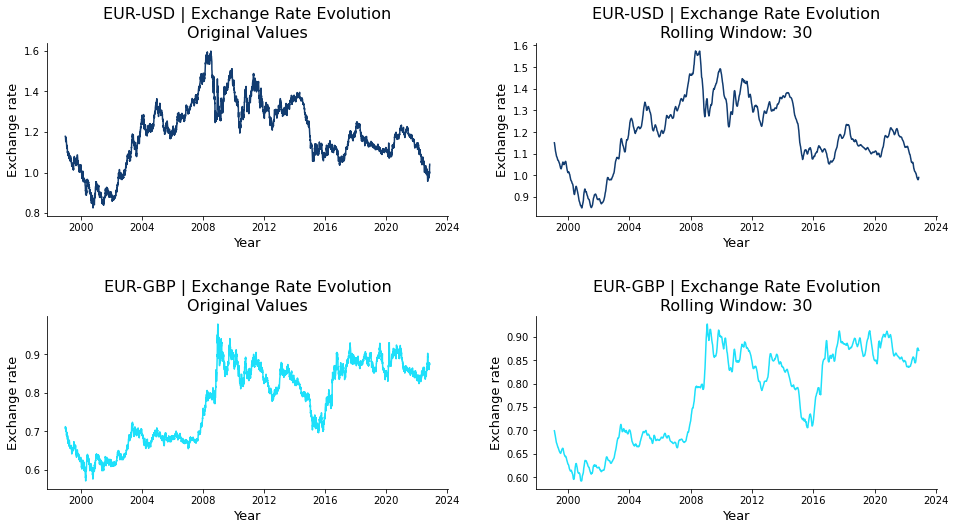

In [10]:
axs = 1
colors = ['#123c70', '#1ee0fa']

plt.figure(figsize=(14, 8))
for df, color in zip([euro_dollar, euro_pound], colors):
    col_names = list(df.columns.values)[1:]
    currency = col_names[0]
    for i in range(1, 3):
        plt.subplot(2, 2, axs)
        ycol = col_names[i-1]
        title = 'EUR-' + currency + ' | Exchange Rate Evolution\n'
        if (axs % 2) != 0:
            title += 'Original Values'
        else:
            title += 'Rolling Window: 30'
        line_plot(df, 'Time', ycol, color, title, 'Year', 'Exchange rate')
        axs += 1

plt.tight_layout(pad = 3)
plt.rcParams['figure.dpi'] = 300

**Insights:**
- In both examples, the lowest values can be noticed during 2001-2002.


- The EUR/USD exchange rate thereafter had an almost continuous rise until 2008, when it reached its greatest level. Afterward, it progressively decreased with very noticeable swings until 2015.


- On the contrary, there's a minor increase in the EUR/GBP exchange rate from 2003 to 2004, which remained stable until the end of 2007. After then, there's an almost accelerated growth till 2009, which was the maximum peak. Since then, we can observe a slow fall with extremely noticeable changes until 2016, but the numbers then quickly rise again until the end of 2017. The following variations are minimal.

The greatest peaks in both exchange rates would be associated with the financial crisis of 2007–2008, which started in the US and eventually had an influence on other countries (especially Europe).

# 5

## Financial Crisis of 2007–2009 in US | The Great Recession 
A chronology of structured information would be a great method to address the crises that have affected the exchange rate values. The best way would be to use information from credible sources that describe particular occurrences for this reason, and then, display them in a line plot.

> *Information derived from the [article](https://www.cfr.org/timeline/us-financial-crisis)*.
- **February 2007:** United States experience the greatest single-year loss in house sales in more than two decades.
- **April 2007:** The largest subprime lender in the United States, New Century Financial Corporation, declares bankruptcy.
- **August 2007:** Subprime mortgage problems spread worldwide as hedge funds and banks around the globe reveal substantial holdings of mortgage-backed securities
- **September 2007:** The Federal Reserve makes its first in a series of interest rate cuts, lowering the benchmark federal funds rate for the first time since 2003, from 5.25 percent to 4.75 percent. 
- **February 2008:** President Bush and House leaders struck a deal for a 150 billion dollars fiscal stimulus package.
- **March 2008:** [Bear Stearns](https://en.wikipedia.org/wiki/Bear_Stearns) announces major liquidity problems and is granted a twenty-eight-day emergency loan from the New York Federal Reserve Bank.
- **September 2008:** [Lehman Brothers](https://en.wikipedia.org/wiki/Lehman_Brothers), a major global investment bank and a fixture on Wall Street for more than 150 years, files for the largest bankruptcy in U.S. history. Just a day after Lehman is allowed to collapse, the Fed steps in to rescue American International Group ([AIG](https://www.aig.com/individual)), the largest insurer in the United States, with an 85 billion dollars loan.
- **December 2008:** The National Bureau of Economic Research acknowledged that the United States was in a recession, which had begun a year before in December 2007. Furthermore, monthly job-loss data indicated that over 500,000 jobs were lost in November.
- **February 2009:** Amid a wave of global spending on fiscal stimulus, newly inaugurated President Barack Obama signs a 787 billion dollars stimulus package into law.
- **April 2009:** Leaders from the Group of Twenty ([G20](https://en.wikipedia.org/wiki/G20)), representing the world’s leading economies, meet in London, where they pledge to triple funding for the International Monetary Fund and increase trade financing.

Next step is to plot the facts indicated above based on the EUR-USD exchange rate, with an emphasis on the data for 2008. To do this, let's divide 2008 into quarters.

In [11]:
crisis_usa = euro_dollar.copy()[(euro_dollar['Time'].dt.year >= 2006) & (euro_dollar['Time'].dt.year <= 2009)]
crisis_07_08 = crisis_usa.copy()[(crisis_usa.Time.dt.year >= 2007) & (crisis_usa.Time.dt.year <= 2008)]
crisis_08 = crisis_07_08.copy()[crisis_07_08.Time.dt.year > 2007]

crisis_q1 = crisis_08.copy()[(crisis_08['Time'] >= '2008-01-01') & (crisis_08['Time'] < '2008-04-01')]
crisis_q2 = crisis_08.copy()[(crisis_08['Time'] >= '2008-04-01') & (crisis_08['Time'] < '2008-07-01')]
crisis_q3 = crisis_08.copy()[(crisis_08['Time'] >= '2008-07-01') & (crisis_08['Time'] < '2008-10-01')]
crisis_q4 = crisis_08.copy()[(crisis_08['Time'] >= '2008-10-01')]

Let's visualize a line plot now.

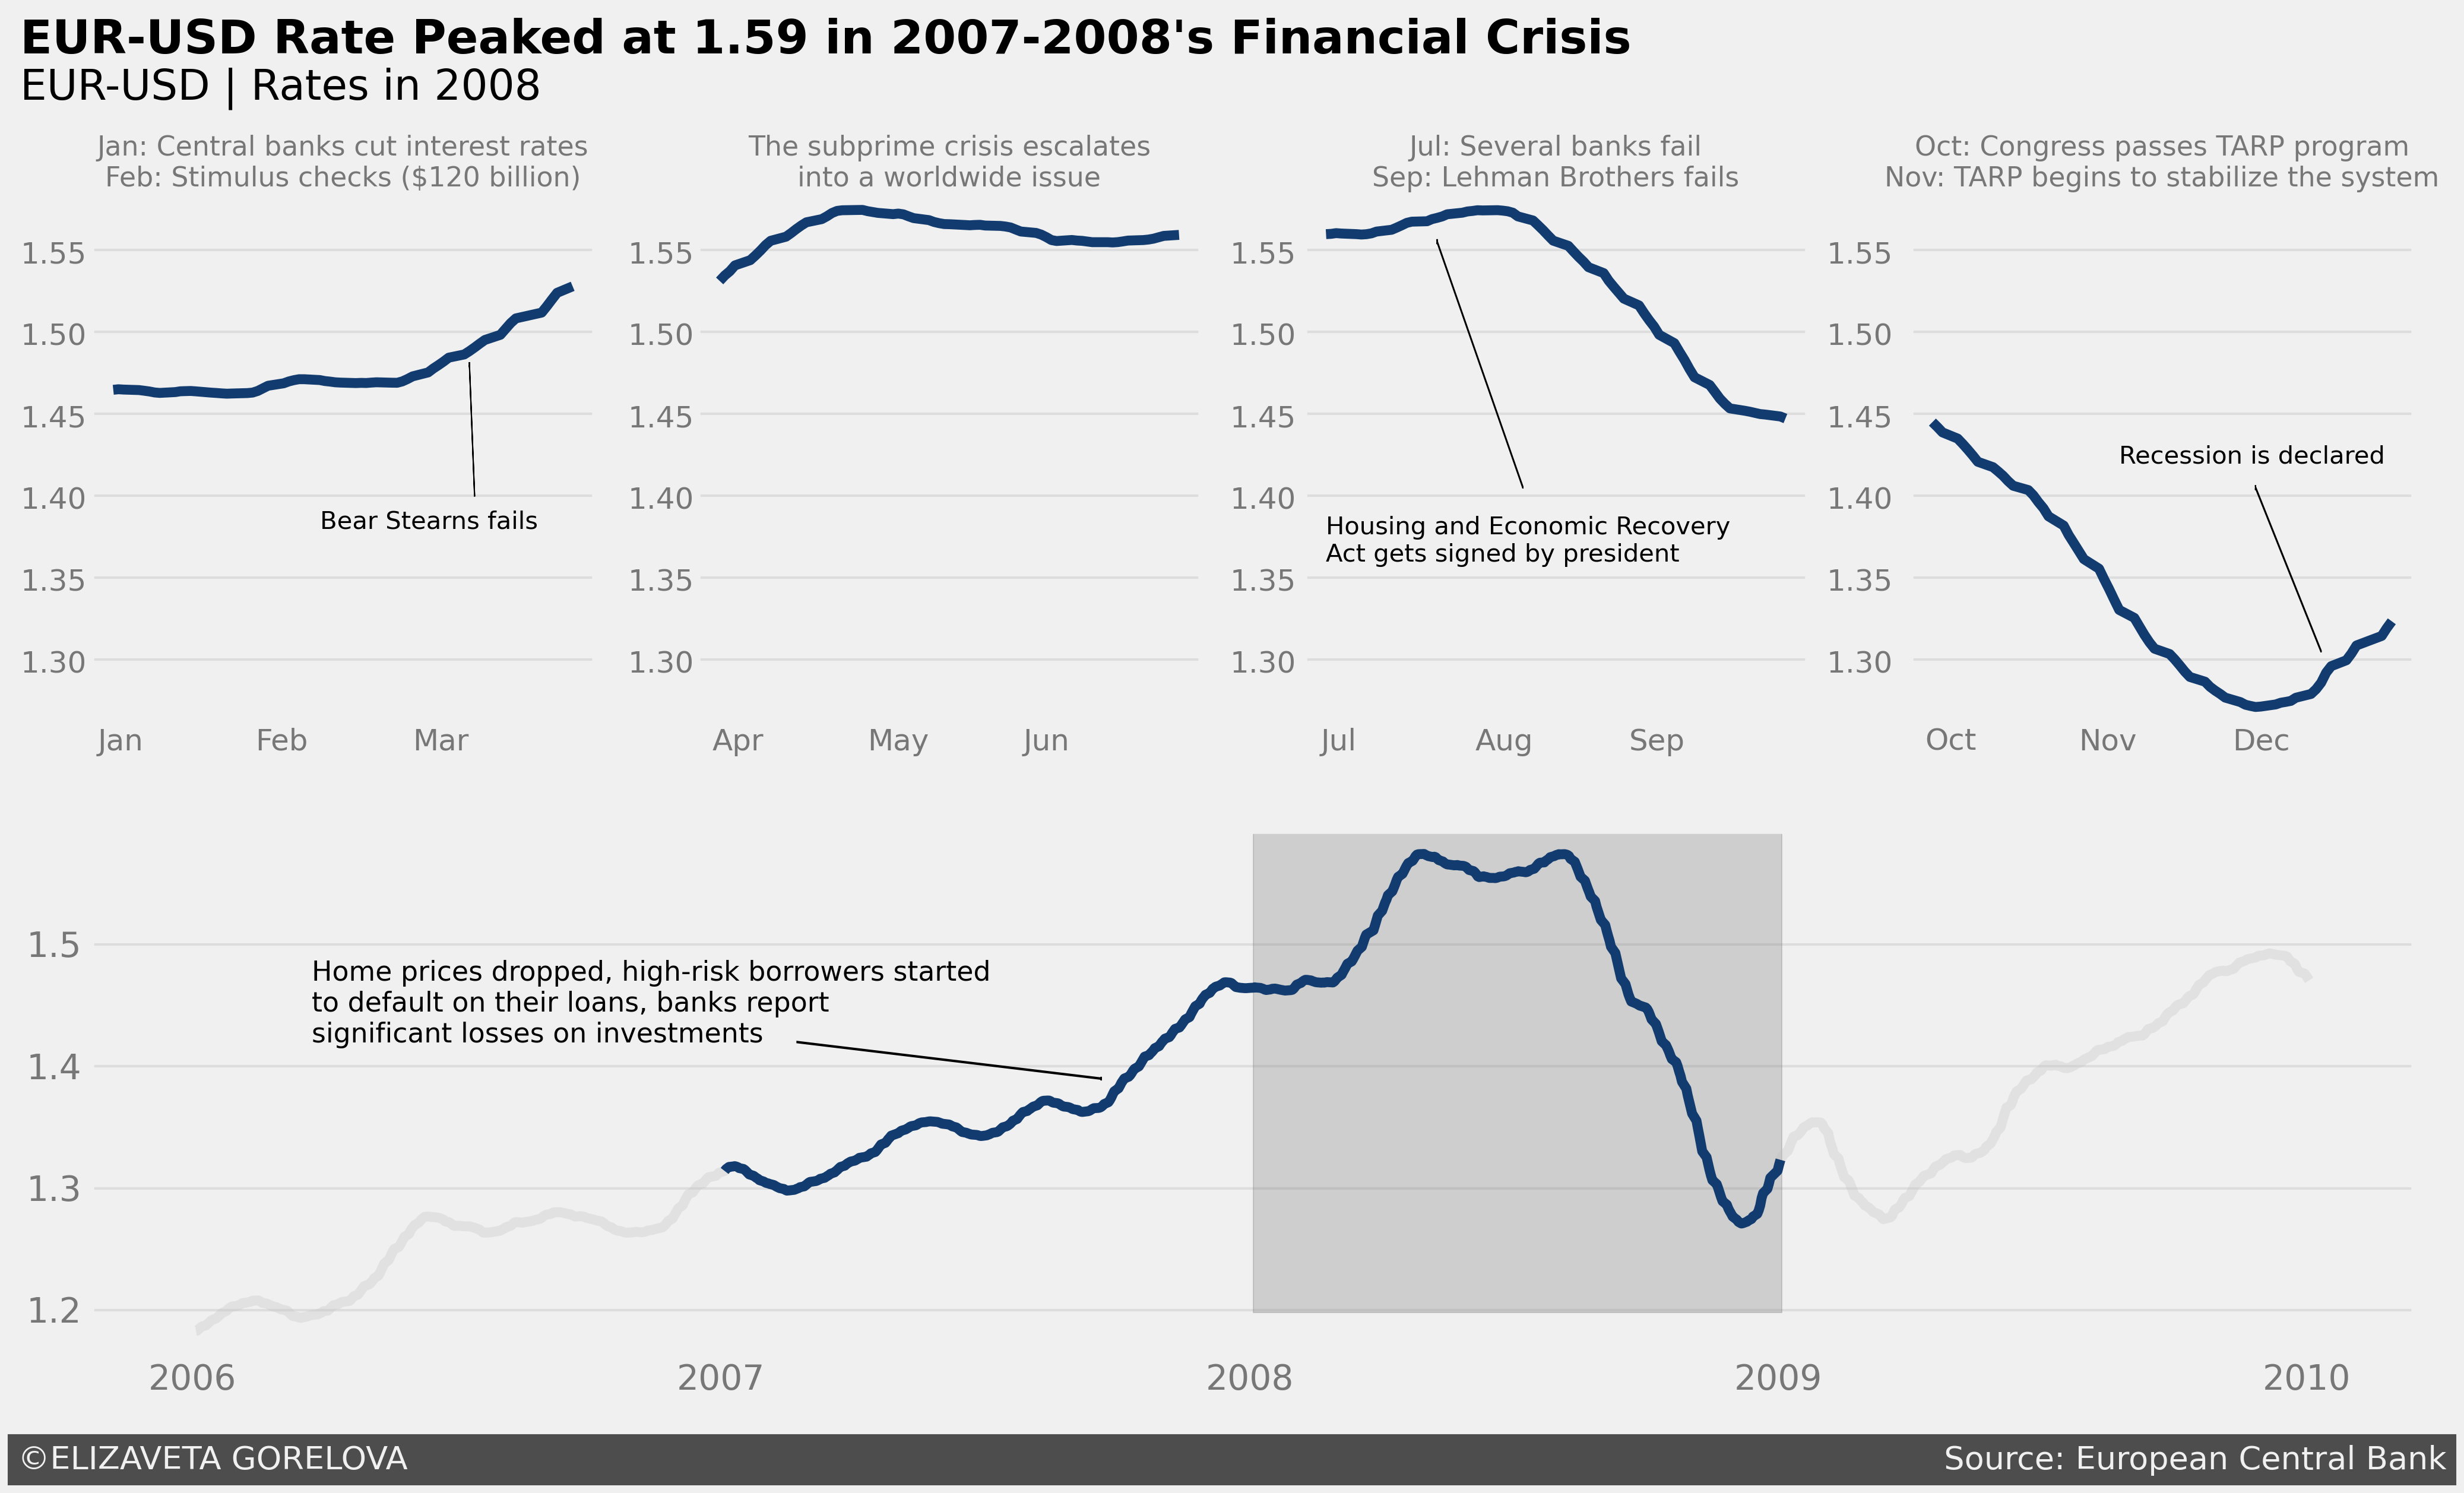

In [12]:
style.use('fivethirtyeight')

plt.figure(figsize = (15, 8))
ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)
ax5 = plt.subplot(2,1,2)

quarters = [('Jan', 'Feb', 'Mar'), ('Apr', 'May', 'Jun'), ('Jul', 'Aug', 'Sep'), ('Oct', 'Nov', 'Dec')]
exchange_rate = ['1.30', '1.35', '1.40', '1.45', '1.50', '1.55']
axes = [ax1, ax2, ax3, ax4]
titles = ['Jan: Central banks cut interest rates\nFeb: Stimulus checks ($120 billion)',
          'The subprime crisis escalates\ninto a worldwide issue',
          'Jul: Several banks fail\nSep: Lehman Brothers fails',
          'Oct: Congress passes TARP program\nNov: TARP begins to stabilize the system']

x, y = 13877, 1.292
xpos_zoom = 13862

for ax, df, months, title in zip(axes, [crisis_q1, crisis_q2, crisis_q3, crisis_q4], quarters, titles):
    ax.plot(df['Time'], df['rolling_mean'], color = '#123c70')
    ax.set_ylim(1.26, 1.58)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title, size = 11, alpha = 0.5)
    
    for month in months:
        ax.text(x, 1.245, month, alpha = 0.5, size = 12)
        x += 30.5
    for rate in exchange_rate:
        ax.text(xpos_zoom, y, rate, alpha = 0.5, size = 12)
        y += 0.05
    
    ax.yaxis.grid(True, alpha = 0.5)
    ax.xaxis.grid(False)
    
    y = 1.292
    xpos_zoom += 90

ax1.text(13862, 1.67, 'EUR-USD Rate Peaked at 1.59 in 2007-2008\'s Financial Crisis', weight = 'bold', size = 19)
ax1.text(13862, 1.642, 'EUR-USD | Rates in 2008', size = 17)
ax1.arrow(13950, 1.4, -1, 0.08, color = 'black')
ax1.annotate('Bear Stearns fails',
             xy = (13920, 1.38), size = 10)

ax3.arrow(14100, 1.405, -17, 0.15, color = 'black')
ax3.annotate('Housing and Economic Recovery\nAct gets signed by president',
             xy = (14061, 1.36), size = 10)

ax4.arrow(14230, 1.305, -13, 0.1, color = 'black')
ax4.annotate('Recession is declared', xy = (14190, 1.42), size = 10)

ax5.plot(crisis_usa['Time'], crisis_usa['rolling_mean'], color = 'silver', alpha = 0.3)
ax5.plot(crisis_07_08['Time'], crisis_07_08['rolling_mean'], color = '#123c70')
ax5.set_xticklabels([])
ax5.set_yticklabels([])
ax5.axvspan(xmin = 13880, xmax = 14245, ymin = 0.08, alpha = 0.3, color = 'grey')
ax5.arrow(13565, 1.42, 210, -0.03, color = 'black')
ax5.annotate('Home prices dropped, high-risk borrowers started\nto default on their loans, banks report\nsignificant losses on investments',
             xy = (13230, 1.42), size = 11)

ax5.text(13027, 1.07, '©ELIZAVETA GORELOVA' + ' ' * 150 + 'Source: European Central Bank',
         color = '#f0f0f0', backgroundcolor = '#4d4d4d', size = 13)

x = 13117
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax5.text(x, 1.135, year, alpha = 0.5, size = 14)
    x += 365

y = 1.19
for year in ['1.2', '1.3', '1.4', '1.5']:
    ax5.text(13033, y, year, alpha = 0.5, size = 14)
    y += 0.1

ax5.yaxis.grid(True, alpha = 0.5)
ax5.xaxis.grid(False)

plt.show()

**Insights:**

- In December 2007, when the U.S. economy was struggling, the EUR-USD exchange rate started to increase and eventually reached a plateau, which it would maintain until nearly the end of February 2008.
- The exchange rate then started to rise in March and kept going until it reached its highest point (1.59) in April, at which point it became evident that the crisis had already spread to other countries.
- Ever since, there have been minor swings up until August, when the exchange rate started to decrease. Then it continued to decline until it reached its lowest point of the year in December. This was most likely caused by the government's activities, which were already putting crisis response plans into place. The recession was, nevertheless, formally proclaimed during that month.

Let's look at the [GDP per capita performance](https://ourworldindata.org/grapher/gdp-per-capita-growth?tab=chart&time=2006..2010&country=USA~CAN~MEX) in the major North American countries as an extension of this analysis.
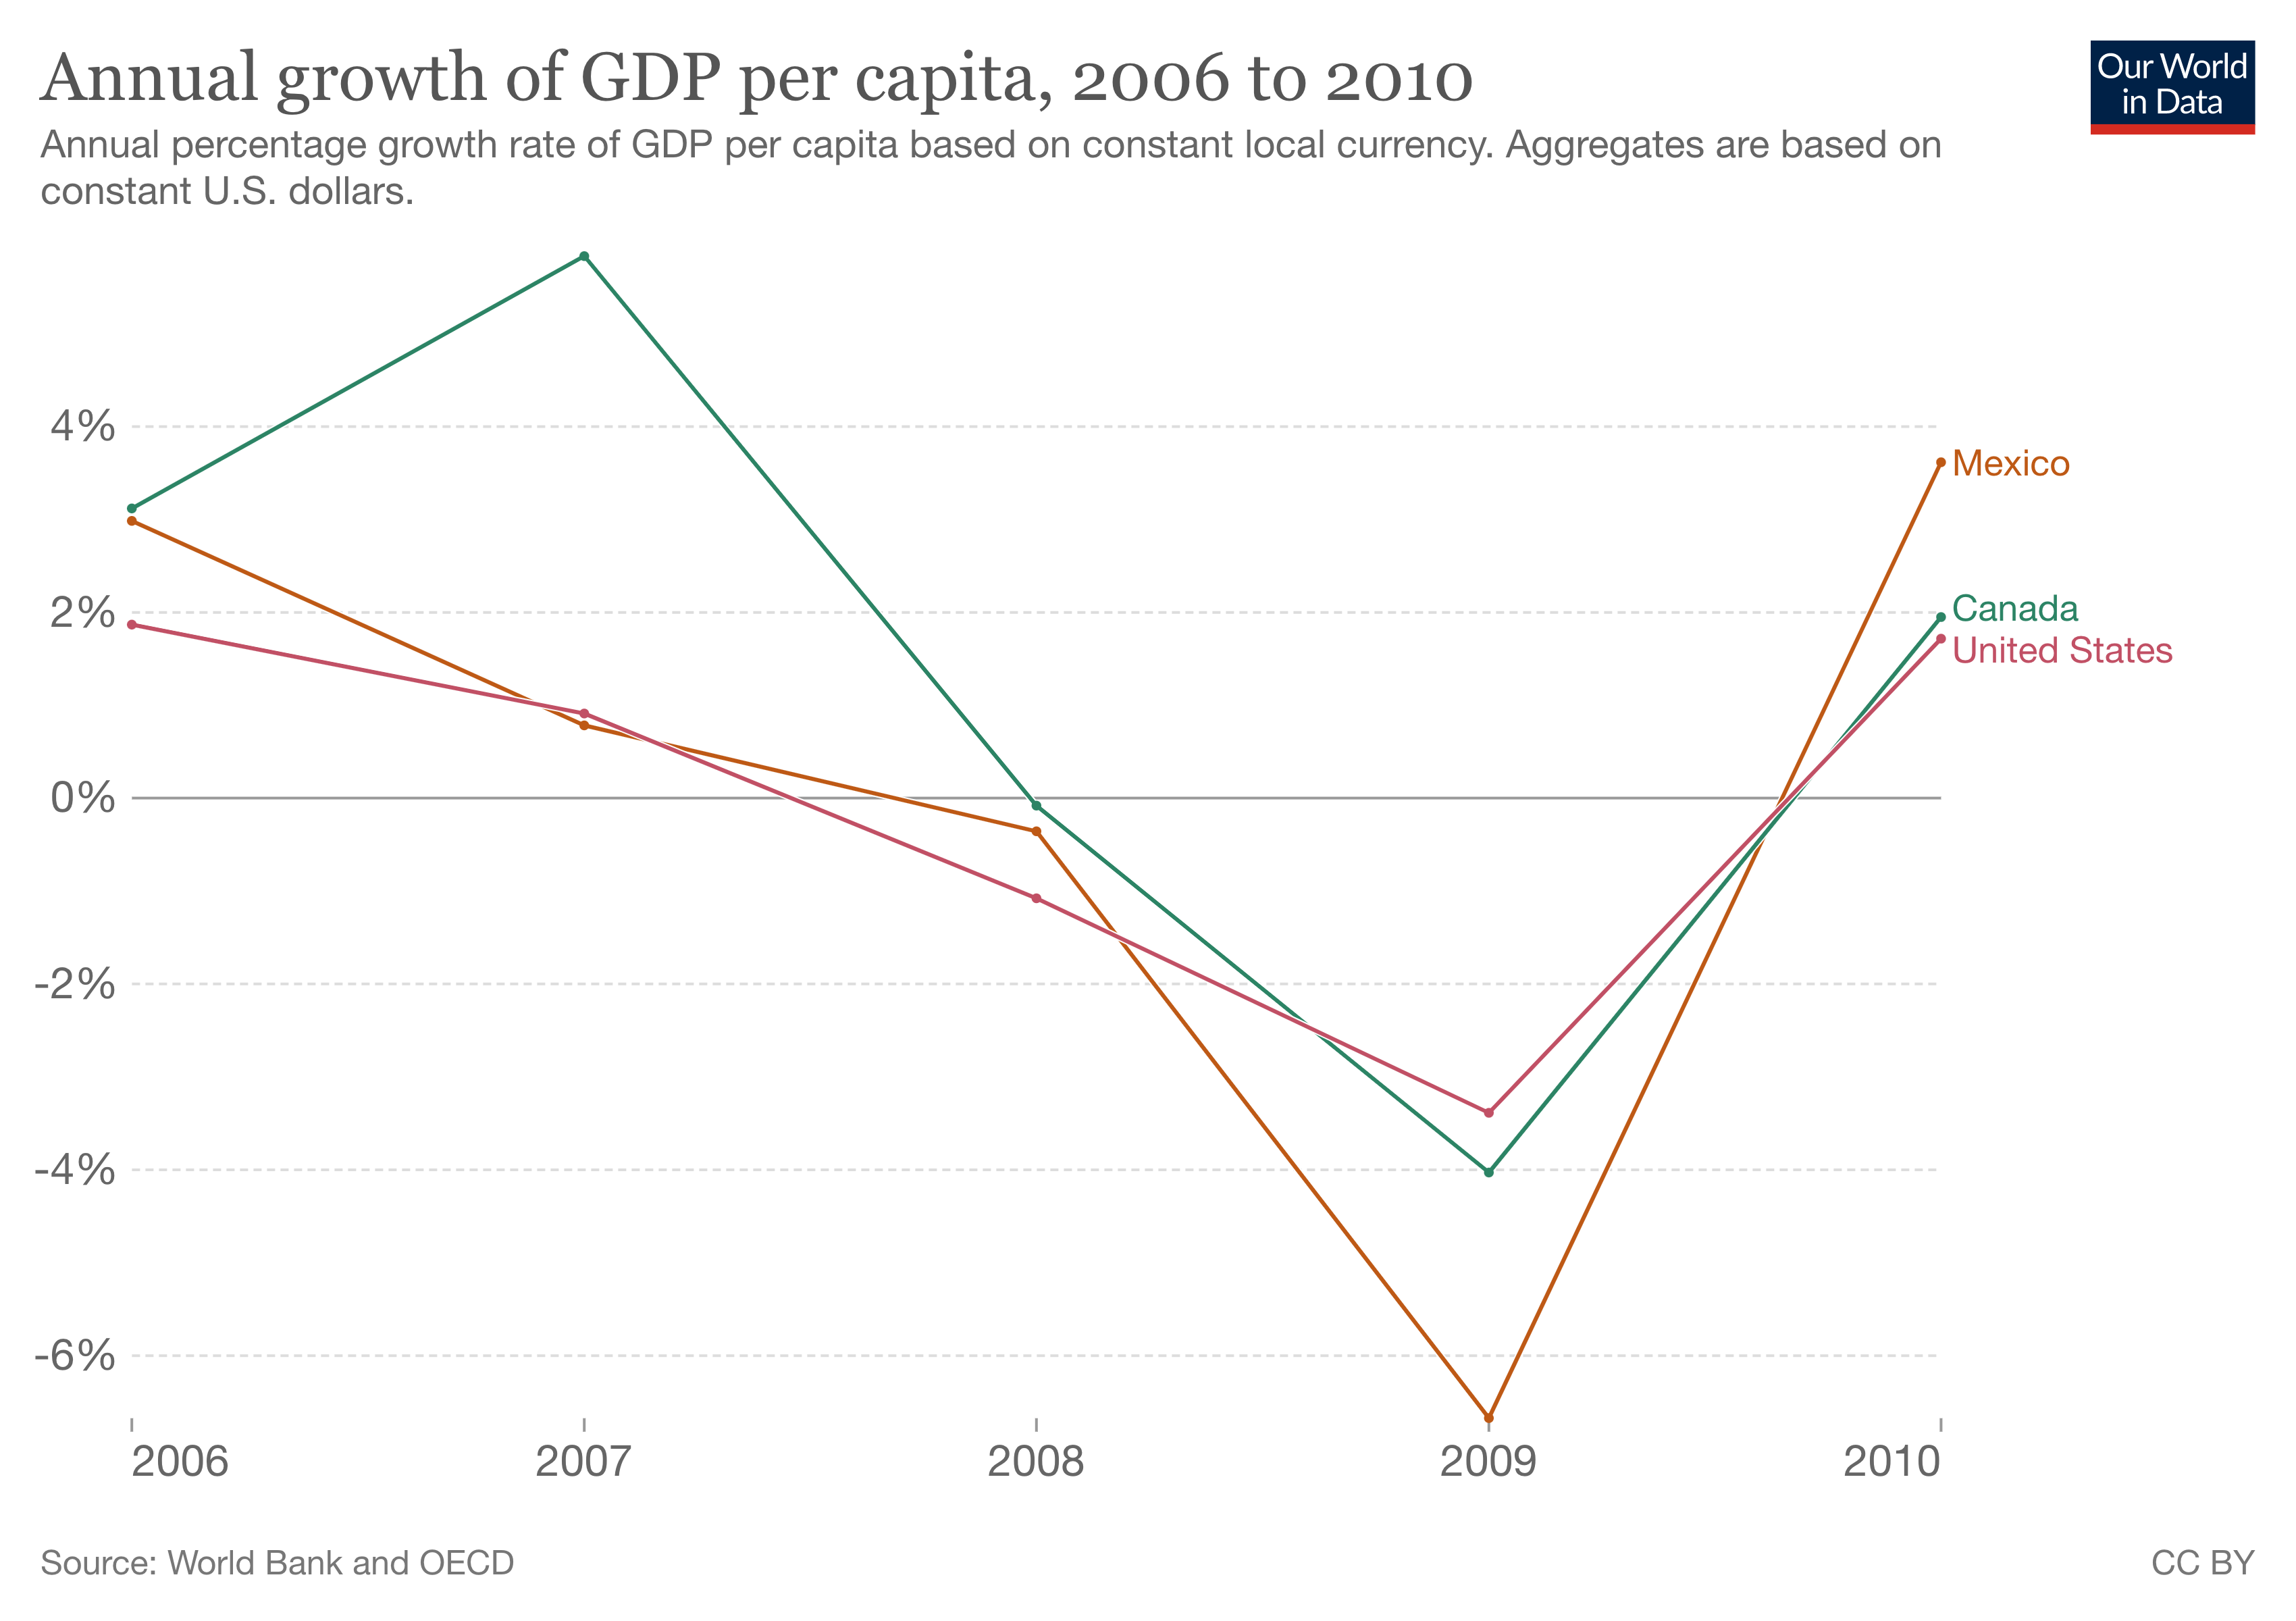

It seems that a US chart trajectory is virtually the opposite of the EUR-USD exchange rate trend that was previously examined. The key difference is a one-year gap and this is because of the effects of the world financial crisis.

# 6

## Financial Crisis of 2008-2012 in EU

> *Information derived from the [article](https://corporatefinanceinstitute.com/resources/fixed-income/european-sovereign-debt-crisis/)*.
- **2008:** The financial crisis hits the global economy, and Ireland is the first to collapse in Europe.
- **2009:** Greece's stock of debt is unveiled - 113% of GDP, with a deficit of 13.6% of GDP, as opposed to the reported 6.7%. Greece's credit ratings fall, spurring fears of a crisis. In the mean time, the EUR-GBP exchange rate reaches a high point of around 0.94 and the UK unemployment rate starts to grow dramatically - from 5.8% to 7.7%, peaking in 2011 with 8.1%.
- **2010:** As investors demand higher interest rates, the dollar value of debt increases. Portugal, Spain, and other countries experience major market crashes. The European Financial Stability Facility ([EFSF](https://www.investopedia.com/terms/e/european-financial-stability-facility.asp)) was created as a temporary crisis resolution mechanism .
- **2011:** The crisis deepens, and countries struggle with debt. [ECB](https://www.ecb.europa.eu/home/html/index.en.html) uses [Security Market Program](https://www.bundesbank.de/en/tasks/monetary-policy/outright-transactions/terminated-programmes-625984) to buy bonds and increase confidence. Portugal requests a bail-out.
- **2012:** The EU adopts the [fiscal compact](https://en.wikipedia.org/wiki/European_Fiscal_Compact), mandating stricter budget disciplines. The crisis continues, and institutions work to control it.
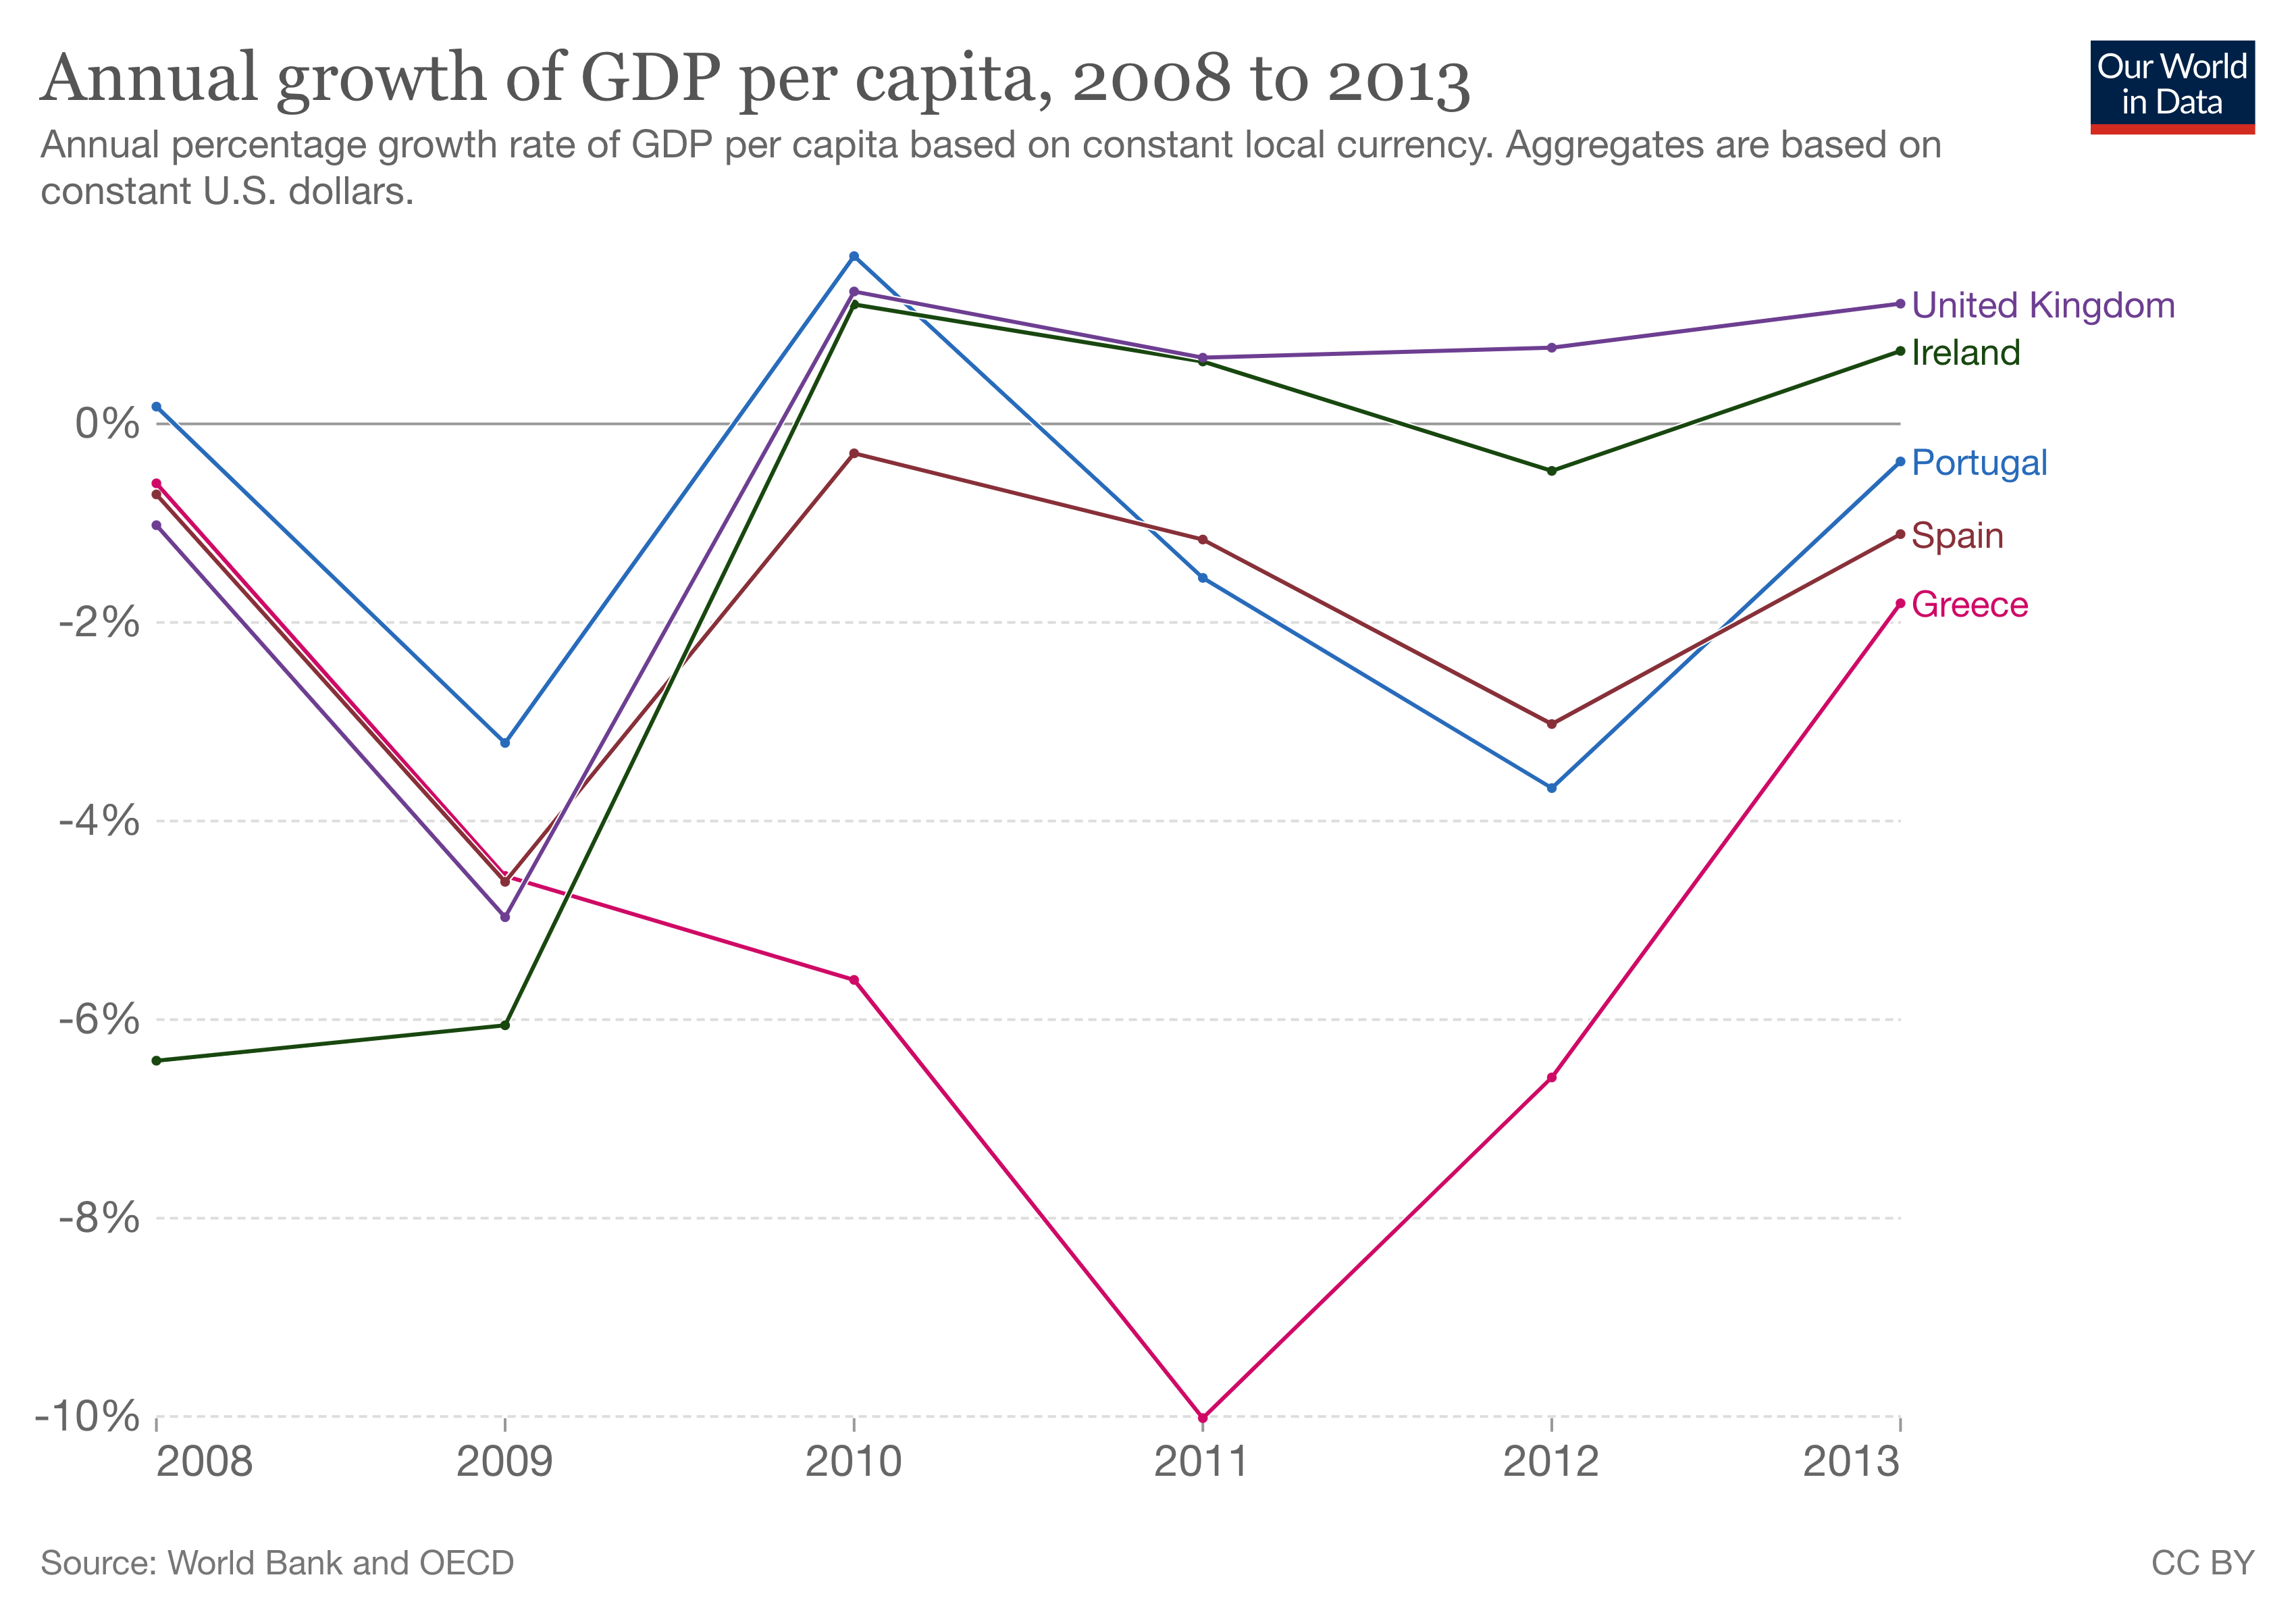

While the EUR-GBP exchange rate reaches its highest point in 2009, the UK experiences the lowest GDP per capita growth in that year. The other countries in Europe have similar situation.

# 7

## Financial Crisis of 2008-2012 in UK 
Now, let's examine the trajectory of the EUR/GBP exchange rate during the European financial crisis. 

In [13]:
crisis_uk = euro_pound.copy()[(euro_pound['Time'].dt.year >= 2008) & (euro_pound['Time'].dt.year <= 2012)]
crisis_09_11 = crisis_uk.copy()[(crisis_uk.Time.dt.year >= 2009) & (crisis_uk.Time.dt.year <= 2011)]

crisis_09 = crisis_09_11.copy()[(crisis_09_11['Time'].dt.year >= 2009) & (crisis_09_11['Time'].dt.year < 2010)]
crisis_10 = crisis_09_11.copy()[(crisis_09_11['Time'].dt.year >= 2010) & (crisis_09_11['Time'].dt.year < 2011)]
crisis_11 = crisis_09_11.copy()[(crisis_09_11['Time'].dt.year >= 2011)]

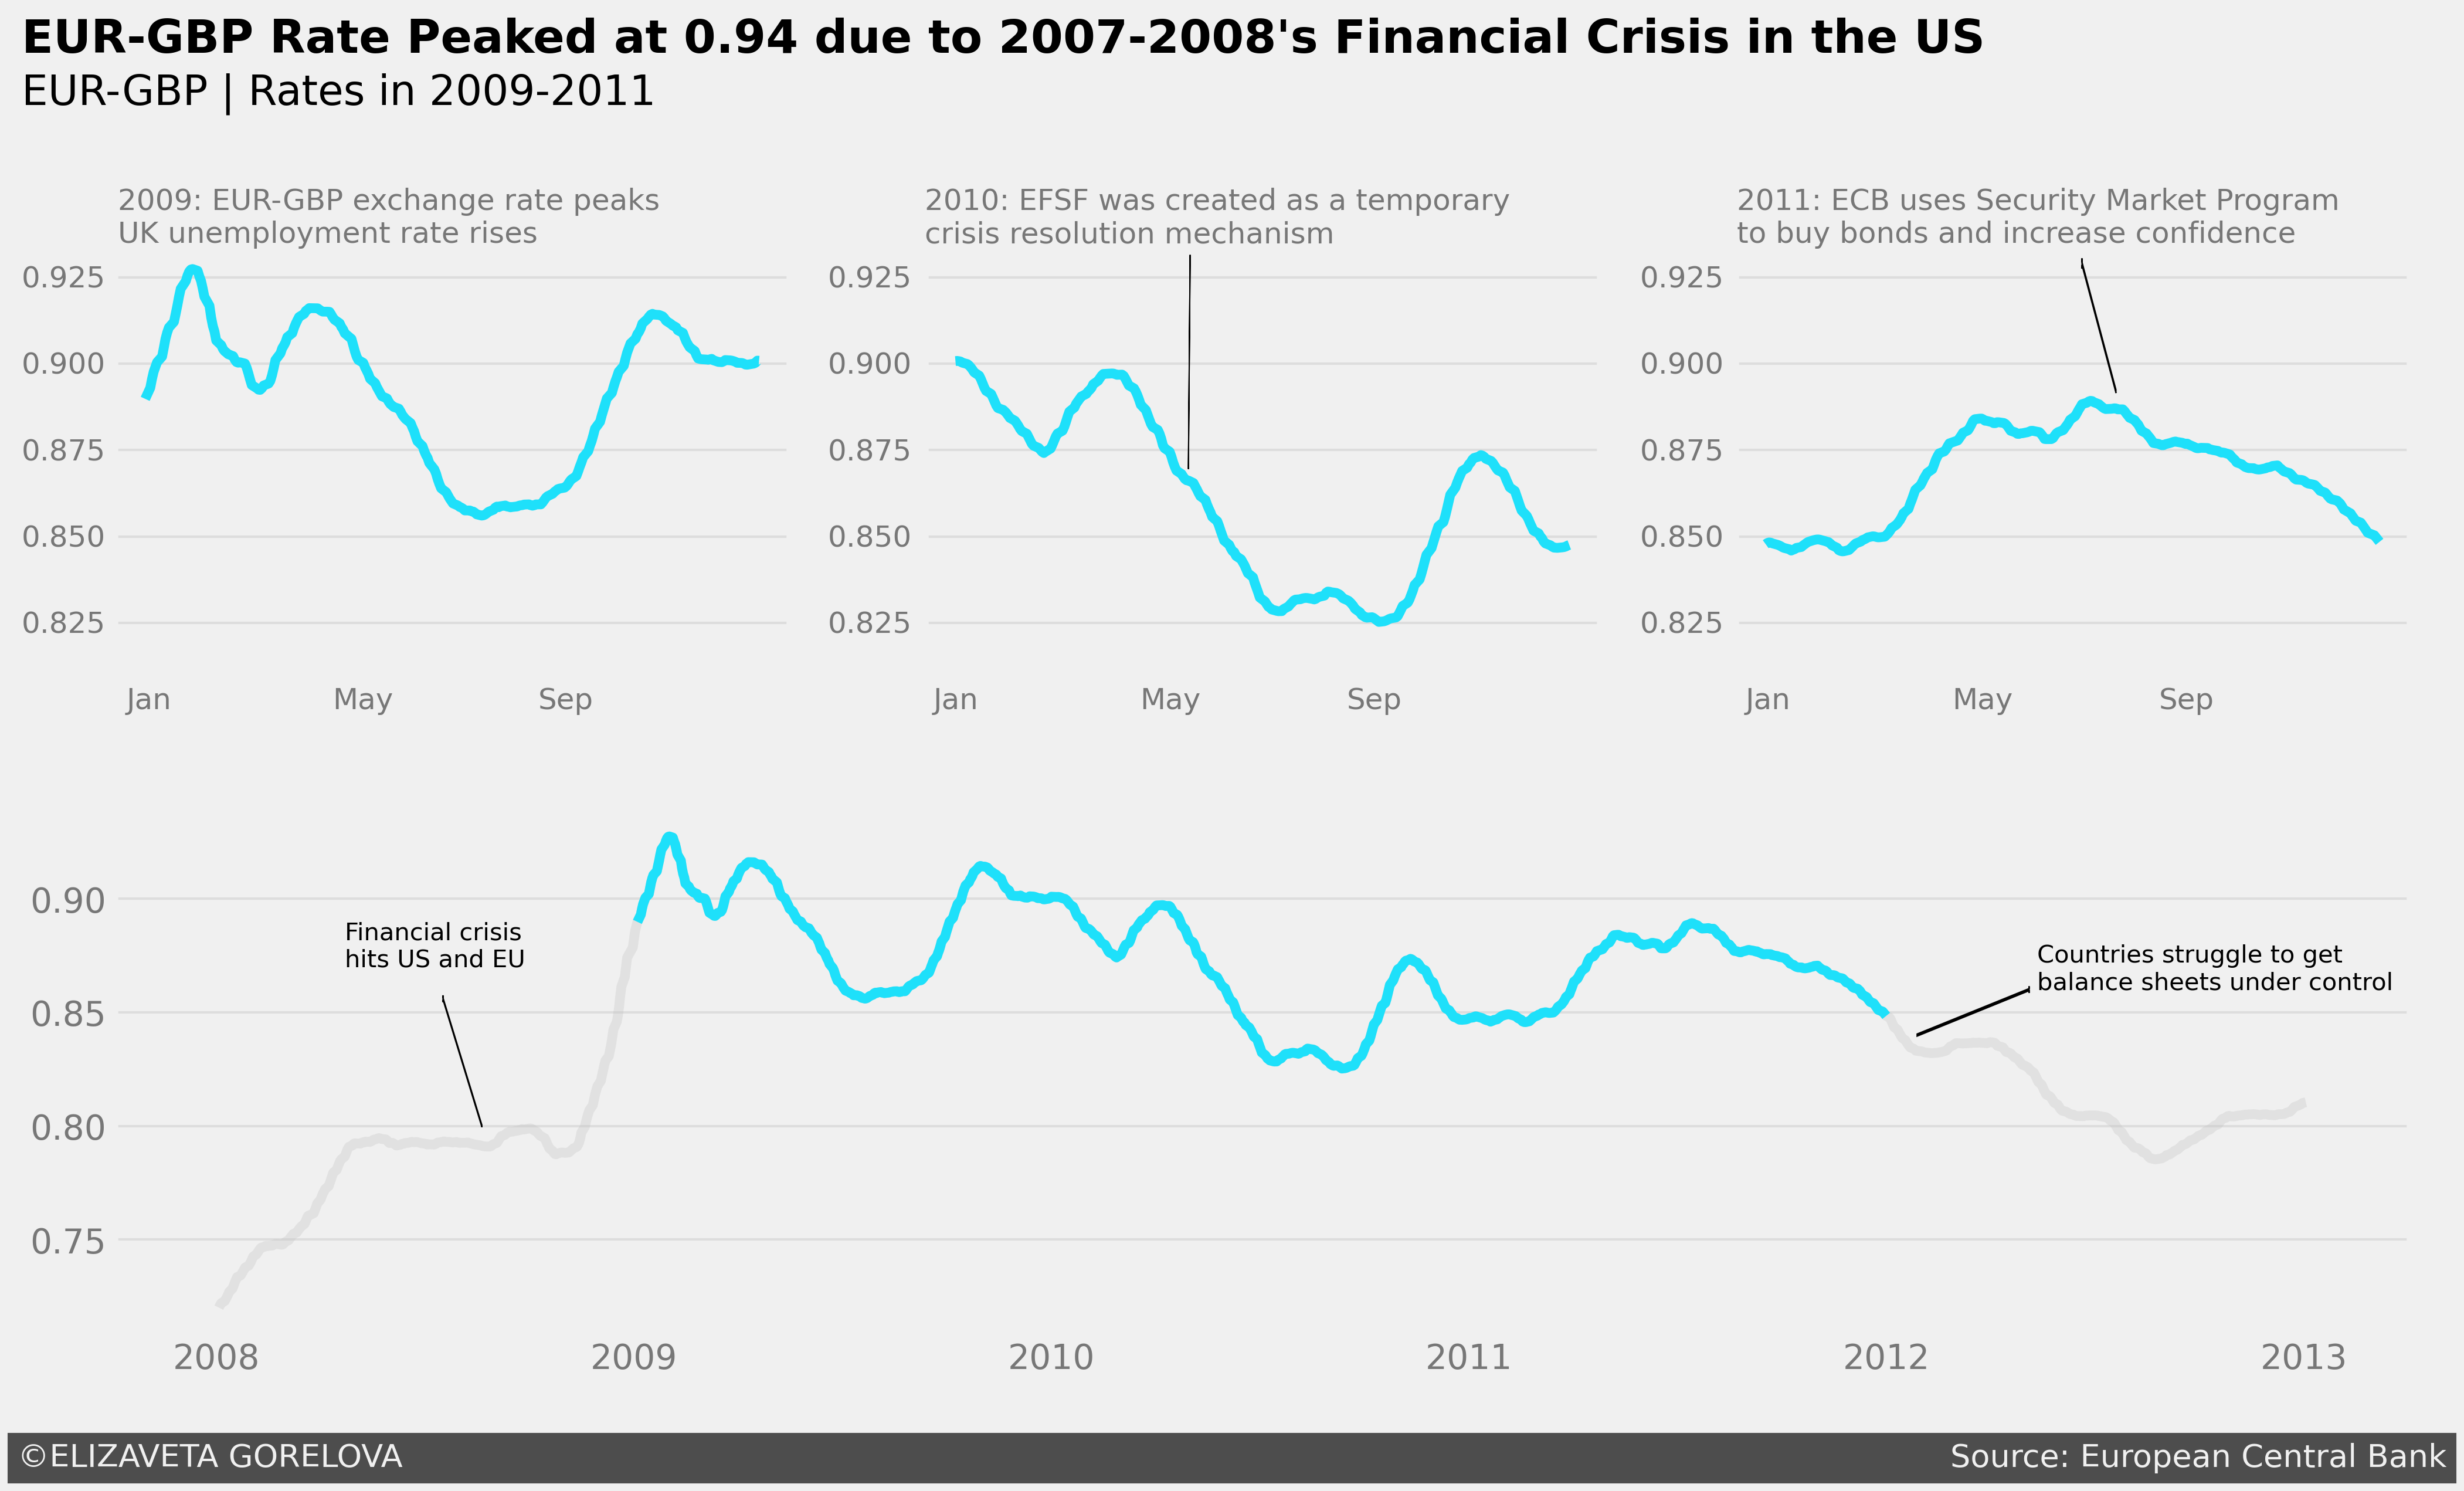

In [14]:
plt.figure(figsize = (15, 8))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)

months = ['Jan', 'May', 'Sep']
exchange_rate = ['0.825', '0.850', '0.875', '0.900', '0.925']
axes = [ax1, ax2, ax3]
titles = ['2009: EUR-GBP exchange rate peaks\nUK unemployment rate rises',
         '2010: EFSF was created as a temporary\ncrisis resolution mechanism',
         '2011: ECB uses Security Market Program\nto buy bonds and increase confidence']

x, y = 14235, 0.822
xpos_zoom, xtitle = 14173, 14230

for ax, df, month, title in zip(axes, [crisis_09, crisis_10, crisis_11], months, titles):
    ax.plot(df['Time'], df['rolling_mean'], color = '#1ee0fa')
    ax.set_ylim(0.8, 0.95)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.text(xtitle, 0.935, title, size = 12, alpha = 0.5)
    
    for month in months:
        ax.text(x, 0.8, month, alpha = 0.5, size = 12)
        x += 121.66
    for rate in exchange_rate:
        ax.text(xpos_zoom, y, rate, alpha = 0.5, size = 12)
        y += 0.025
    
    ax.yaxis.grid(True, alpha = 0.5)
    ax.xaxis.grid(False)
    
    y = 0.822
    xpos_zoom += 365
    xtitle +=365

ax1.text(14173, 0.99, 'EUR-GBP Rate Peaked at 0.94 due to 2007-2008\'s Financial Crisis in the US', weight = 'bold', size = 19)
ax1.text(14173, 0.975, 'EUR-GBP | Rates in 2009-2011', size = 17)

ax2.arrow(14750, 0.87, 1, 0.06, color = 'black')
ax3.arrow(15183, 0.892, -20, 0.037, color = 'black')

ax4.plot(crisis_uk['Time'], crisis_uk['rolling_mean'], color = 'silver', alpha = 0.3)
ax4.plot(crisis_09_11['Time'], crisis_09_11['rolling_mean'], color = '#1ee0fa')
ax4.set_xticklabels([])
ax4.set_yticklabels([])

ax4.arrow(14110, 0.8, -34, 0.056, color = 'black')
ax4.annotate('Financial crisis\nhits US and EU', xy = (13990, 0.87), size = 10)
ax4.arrow(15365, 0.84, 98, 0.02, color = 'black')
ax4.annotate('Countries struggle to get\nbalance sheets under control', xy = (15470, 0.86), size = 10)

ax4.text(13704, 0.65, '©ELIZAVETA GORELOVA' + ' ' * 153 + 'Source: European Central Bank',
         color = '#f0f0f0', backgroundcolor = '#4d4d4d', size = 13)

x = 13840
for year in ['2008', '2009', '2010', '2011', '2012', '2013']:
    ax4.text(x, 0.693, year, alpha = 0.5, size = 14)
    x += 365

y = 0.744
for year in ['0.75', '0.80', '0.85', '0.90']:
    ax4.text(13715, y, year, alpha = 0.5, size = 14)
    y += 0.05

ax4.yaxis.grid(True, alpha = 0.5)
ax4.xaxis.grid(False)

plt.show()

**Insights:**
- The EUR-GBP exchange rate has been rising since the outbreak of the European financial crisis in September 2008, reaching its peak in the beginning of 2009 at about 0.94.


- The trajectory of the EUR-GBP exchange rate started to decline in 2010, the year the EFSF was formed to assist nations with liquidity issues. However, it slightly grew again by the end of the year.


- The EUR-GBP exchange rate had reached a plateau in the start of 2011. After that, a slight rise was noted up to almost the halfway point of the year. The EU was simultaneously adopting measures to stop the financial crisis and bailing out the countries in its zone. As can be observed, this appears to have had an impact on the exchange rate since the trajectory began to decrease once more.


- This decrease sustained until just around the middle of 2012, when the exchange rate finally stabilized at a level that was quite similar to that at the start of the world financial crisis.

# 8

## Brexit

[Brexit](https://en.wikipedia.org/wiki/Brexit), which is an acronym of the terms "Britain" and "exit," refers to the United Kingdom's process of leaving the European Union.
Let's create a simple plot and briefly examine how the value of the EUR-GBP exchange rate changed immediately after the Brexit referendum in 2016.

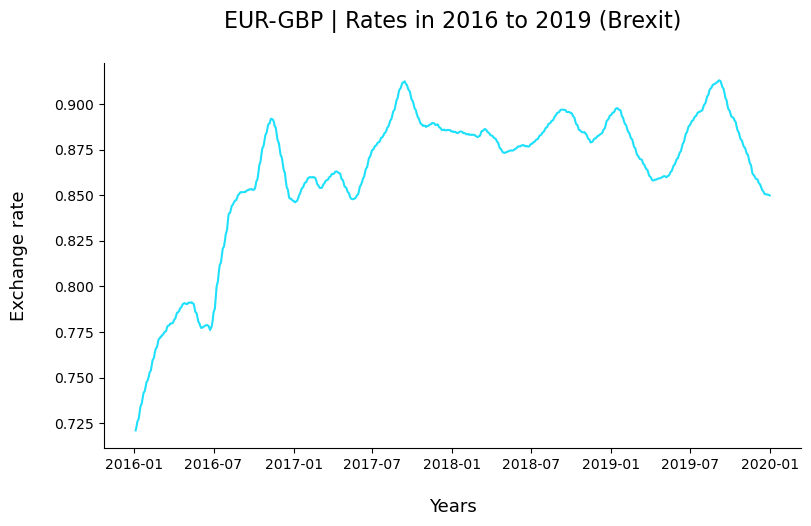

In [15]:
brexit = euro_pound.copy()[(euro_pound['Time'].dt.year >= 2016) & (euro_pound['Time'].dt.year < 2020)]

style.use('default')

plt.figure(figsize = (9, 5))
title = 'EUR-GBP | Rates in 2016 to 2019 (Brexit)\n'
plt.rcParams['figure.dpi'] = 300
line_plot(brexit, 'Time', 'rolling_mean', '#1ee0fa', title, '\nYears', 'Exchange rate\n')

**Insights:**
- Following the global financial crisis, the EUR-GBP exchange rate is once more on the rise. As previously indicated, the United Kingdom decides to leave the European Union in June 2016. Following several agreements and negotiations, the Brexit deal was subsequently approved by the UK parliament in January 2020. A transition time would remain, though, and it would end on December 31 of the same year.

# 9

## Conclusion

In this analysis, the EUR-USD exchange rate was examined throughout the financial crisis of 2007–2008 as well as its subsequent impact on the EUR-GBP exchange rate. Additionally, a quick observation of the variability of the EUR-GBP exchange rate from 2016 to 2019 (Brexit) was done. The key information regarding both exchange rates is provided below:

- The EUR-USD exchange rate was significantly impacted by the financial crisis of 2007–2008. From the end of 2007, it quickly grew until briefly remaining stable from December to the end of February 2008. After then, it kept increasing until reaching its high (about 1.59) in April, the month the world financial crisis was announced.


- The EUR-GBP (UK) exchange rate had reached a plateau at that time and hold steady for a little over 4 months. Yet starting in September, its value would rise quickly until it almost reached its peak (0.94) in January 2009, just as the UK unemployment rate started to rise dramatically. North American and European countries reported the lowest GDP growth rates during the same year, which was the peak of the global financial crisis.


- Likewise, both currency rates (EUR-USD and EUR-GBP) start to indicate a downward trend as the US dealt with the crisis and Europe established plans to help countries with financial issues (the financial crisis was beginning to be brought under control). Meanwhile, North American and European nations are seeing a GDP recovery.


- The proceedings for the United Kingdom's withdrawal from the European Union (Brexit), however, cause the EUR-GBP exchange rate to rise quickly once more in 2016 and remain at high levels.